In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
df=pd.read_csv("C://Users//Admin//Desktop//Predicting Fuel Economy//Dengue Fever Hematological Dataset//Dengue-Dataset.csv")

In [3]:
df.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1523 non-null   object 
 1   Age                          1523 non-null   int64  
 2   Hemoglobin(g/dl)             1523 non-null   float64
 3   Neutrophils(%)               1523 non-null   int64  
 4   Lymphocytes(%)               1523 non-null   int64  
 5   Monocytes(%)                 1523 non-null   int64  
 6   Eosinophils(%)               1523 non-null   int64  
 7   RBC                          1523 non-null   int64  
 8   HCT(%)                       1523 non-null   float64
 9   MCV(fl)                      1523 non-null   float64
 10  MCH(pg)                      1523 non-null   float64
 11  MCHC(g/dl)                   1523 non-null   float64
 12  RDW-CV(%)                    1523 non-null   float64
 13  Total Platelet Cou

In [5]:
df.describe(include='all')

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
count,1523,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042
mean,NaN,40.310571,14.513451,44.484570,43.559422,3.270519,3.083388,4.765594,45.189280,89.815561,29.897225,32.050271,13.635792,173127.170716,9.588806,15.312966,0.289080,5483.024951,NaN
std,NaN,15.286190,1.627142,4.344736,4.972815,1.209507,1.000791,0.722874,3.566435,5.515619,2.026022,1.551697,1.430746,64832.681751,0.848706,1.405457,5.992864,1137.344040,NaN
min,NaN,5.000000,10.400000,29.000000,29.000000,2.000000,1.000000,4.000000,36.300000,80.000000,22.900000,27.080000,11.000000,56000.000000,7.500000,8.400000,0.000020,3500.000000,NaN
25%,NaN,28.000000,13.200000,42.000000,41.000000,2.000000,2.000000,4.000000,42.595000,85.100000,28.400000,30.900000,12.400000,114907.000000,8.900000,14.230000,0.106000,4626.000000,NaN
50%,NaN,39.000000,14.600000,45.000000,44.000000,3.000000,3.000000,5.000000,45.550000,89.700000,30.000000,32.000000,13.800000,167385.000000,9.660000,15.260000,0.141000,5397.000000,NaN
75%,NaN,53.000000,15.800000,48.000000,47.000000,4.000000,4.000000,5.000000,47.840000,94.200000,31.400000,33.200000,14.700000,228649.500000,10.283000,16.400000,0.173000,6131.500000,NaN


### 1.Difference in Population Means - Age and Dengue Result
#### Research Question 
Is there a significant difference in the mean age of patients with positive and negative dengue test results.

**Population**: Population with positive/negetive test result</br>
**Parameter of Interest**: $\mu_1 - \mu_2$, Age.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$  (this is a Two-sided test)</br>

In [6]:
# df.groupby("Result").agg({"Age": [np.mean, np.std, np.size]})

In [7]:
positive_case = df[df["Result"] == 'positive']
negative_case = df[df["Result"] == 'negative']

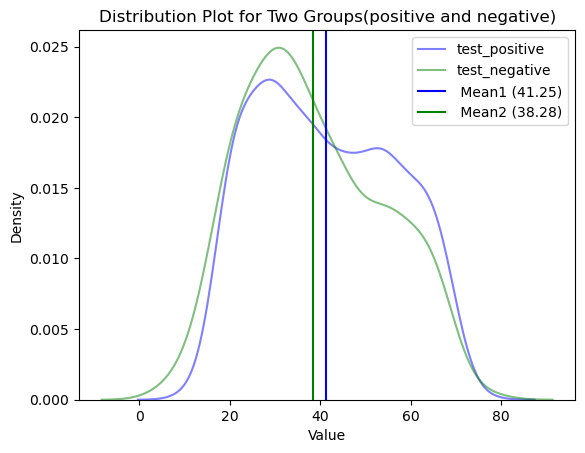

In [8]:
sns.kdeplot(positive_case.Age, label='test_positive', color='blue', alpha=0.5)
sns.kdeplot(negative_case.Age, label='test_negative',  color='green', alpha=0.5)

mean1 = np.mean(positive_case.Age)
mean2 = np.mean(negative_case.Age)

# Add points or lines for means
plt.axvline(mean1, color='blue', linestyle='-', label=f' Mean1 ({mean1:.2f})')
plt.axvline(mean2, color='green', linestyle='-', label=f' Mean2 ({mean2:.2f})')

plt.title("Distribution Plot for Two Groups(positive and negative)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [9]:
n1 = len(positive_case)
mu1 = positive_case.Age.mean() 
sd1 = positive_case.Age.std() 
(n1, mu1, sd1)

(1042, 41.24856046065259, 15.194753089826703)

In [10]:
n2 = len(negative_case)
mu2 = negative_case.Age.mean()
sd2 = negative_case.Age.std()
(n2, mu2, sd2)

(481, 38.27858627858628, 15.30200623003058)

In [11]:
se = np.sqrt(sd1**2/n1+sd2**2/n2) # Standard Error
se

0.8416505409627353

In [12]:
mean_diff = mu1 - mu2
mean_diff

2.9699741820663093

In [13]:
mu_not = 0

In [14]:
t_stat = (mean_diff - mu_not)/se
t_stat

3.528749804721871

In [15]:
# Calculate two-tailed p-value
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(t_stat)))
p_value

0.0004175276729334598

In [16]:
# Using python statmodel libraby
t_stat,p_val = sm.stats.ztest(positive_case["Age"].dropna(), negative_case["Age"].dropna())
t_stat,p_val

(3.5379102169196024, 0.00040330717024595334)

In [17]:
# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


Therefore, we reject the null hypothesis, indicating that there is no statistically significant difference in the mean age of patients with positive dengue test results compared to those with negative results. This suggests that age may not be a determining factor in the likelihood of testing positive for dengue in this sample.

### 2.Two Mean Proportion - Gender and Dengue Result
#### Research Question 
Is there a significant association between gender and dengue test results (positive and negative)?

**Population**: Population with positive/negetive test result</br>
**Parameter of Interest**: Proportion  

**Null Hypothesis:** $P(Male | Positive)=P(Male | Negative)$</br>
                     $And P(Female | Positive)=P(Female | Negative)$</br>
                     
**Alternative Hypthosis:**  $P(Male | Positive) \neq P(Male | Negative)$</br>
                      $ And P(Female | Positive) \neq P(Female | Negative)$ (this is a Two-sided test)</br>

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Result'])
contingency_table

Result,negative,positive
Gender,,
Female,250,555
Male,231,487


In [19]:
# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)


Chi-Square Test Results:
Chi-Square Statistic: 0.17042191196854448
P-Value: 0.67973711310025
Degrees of Freedom: 1

Expected Frequencies:
[[254.23834537 550.76165463]
 [226.76165463 491.23834537]]


In [20]:
# Decision 
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Gender and Result.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Gender and Result.")


Fail to reject the null hypothesis: There is no significant association between Gender and Result.


Fail to reject the null hypothesis: There is no significant association between Gender and Result. This suggests that the distribution of dengue test results (positive or negative) is similar across different genders, indicating that gender does not appear to influence the likelihood of testing positive or negative for dengue in this population.

### 3.Two Mean Difference - Himoglobin Level and Dengue Result
#### Research Question 
Is the mean hemoglobin level higher in patients with a positive dengue test result compared to those with a negative result?

**Population**: Population with positive/negetive test result</br>
**Parameter of Interest**: $\mu_1 - \mu_2$, Hemoglobin levels.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 > \mu_2$  (this is a Two-sided test)</br>

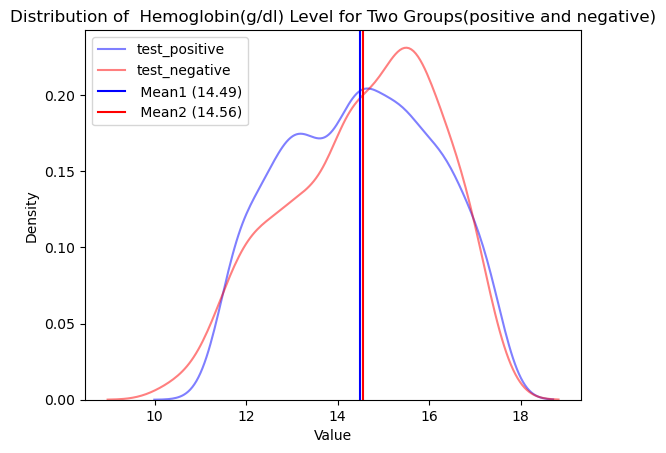

In [24]:
sns.kdeplot(positive_case['Hemoglobin(g/dl)'], label='test_positive', color='blue', alpha=0.5)
sns.kdeplot(negative_case['Hemoglobin(g/dl)'], label='test_negative', color='red', alpha=0.5)

# Calculate means for the two groups
mean1 = np.mean(positive_case['Hemoglobin(g/dl)'])
mean2 = np.mean(negative_case['Hemoglobin(g/dl)'])

# Add points or lines for means
plt.axvline(mean1, color='blue', linestyle='-', label=f' Mean1 ({mean1:.2f})')
plt.axvline(mean2, color='red', linestyle='-', label=f' Mean2 ({mean2:.2f})')

plt.title("Distribution of  Hemoglobin(g/dl) Level for Two Groups(positive and negative)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [22]:
t_stat, p_value = stats.ttest_ind(positive_case['Hemoglobin(g/dl)'], negative_case['Hemoglobin(g/dl)'], alternative='greater')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.7721551552791409
P-value: 0.7799287527711065


In [23]:
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Mean hemoglobin level is significantly higher in positive dengue patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean hemoglobin levels.")

Fail to reject the null hypothesis: No significant difference in mean hemoglobin levels.


We fail to reject the null hypothesis: There is no significant difference in the mean hemoglobin level between patients with a positive dengue test result and those with a negative result. This indicates that the mean hemoglobin levels are similar in both groups, suggesting that hemoglobin levels may not be a reliable indicator of dengue infection status in this population.